In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay


## Variables:
There are 25 variables:

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)

## Data Reading

In [322]:
import pandas as pd

# loading raw data
df = pd.read_csv("credit_card_clients.csv")



In [323]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data Preprocesing

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

* There are no missing data for our database. Next, we take look into more details to the data.

In [325]:
df.shape


(30000, 25)

* there are 1001 col and 24 rows

In [326]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* In average, the client who owns a credit card is 35.48 year old in our sample, the yougest age one can get a credit card is 21 while the most senior age is 79.

* 22.1% of credit card contracts that will default next month

In [327]:
# rename the default payment next month with default and droping id col

df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
df.drop("ID", axis=1, inplace=True)

In [328]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [329]:
# there are some repeatative col name 
#  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [330]:
df.EDUCATION.replace({5:4, 6:4, 0:4}, inplace=True)
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

MARRIAGE FEATURE:

* Marital status (1=married, 2=single, 3=others)
* We'll group categories 1 into category 3 

In [331]:
df['MARRIAGE'].replace({0:3}, inplace=True)
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

## Visualization 

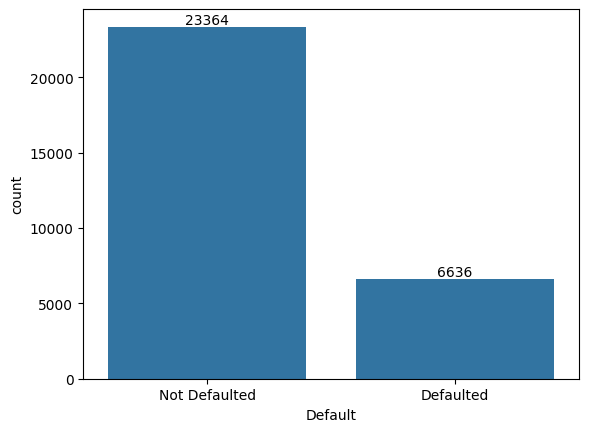

In [332]:
# lets visualize the target variable  

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ax = sns.countplot(x=df['Default'])

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.xticks([0, 1], labels=["Not Defaulted", "Defaulted"])
plt.show()


The data is quite imbalance which about 22% of clients will default next month.

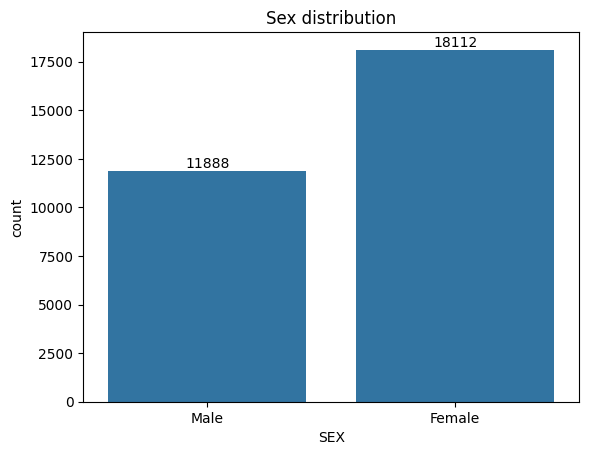

In [333]:
# lets visualize the sex variable  

ax = sns.countplot(x = "SEX", data = df)
for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Sex distribution")
plt.xticks([0,1], labels=["Male", "Female"])
plt.show()

More Female clients own credit card than Male client.

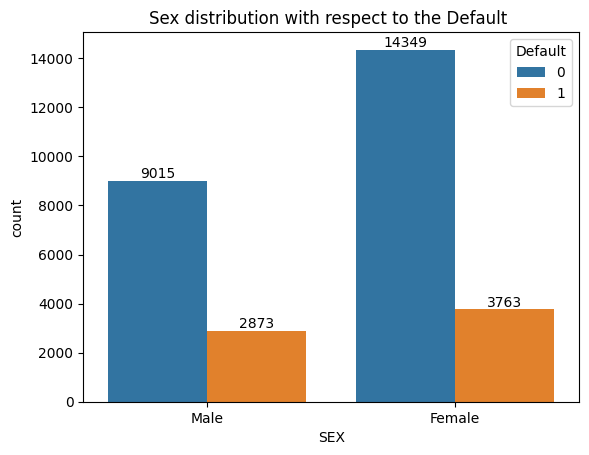

In [334]:
ax = sns.countplot(x = "SEX", data = df, hue="Default")

for container in ax.containers:
    ax.bar_label(container)

plt.title("Sex distribution with respect to the Default ")
plt.xticks([0,1], labels=["Male", "Female"])
plt.show()

32% of male clients fraud credit card while the ratio for female is around 24%

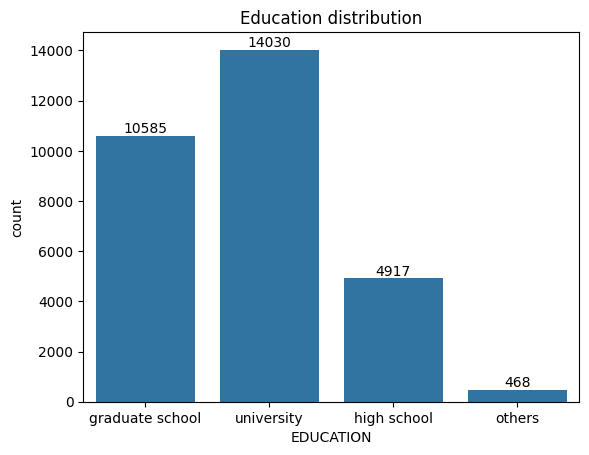

In [335]:
# lets visualize the EDUCATION variable  

ax = sns.countplot(x=df['EDUCATION'])

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

University students are the group which highest number customers using credit cards (44%)

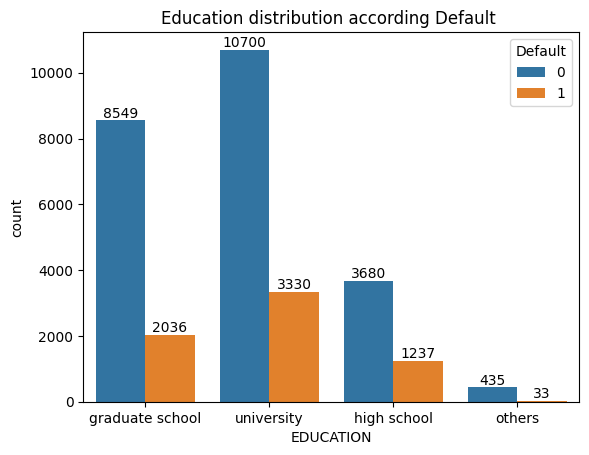

In [336]:
ax=sns.countplot(data=df, x="EDUCATION", hue="Default")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

High school students are the group which has highest fraud cases(34%), follow by university student(26%)

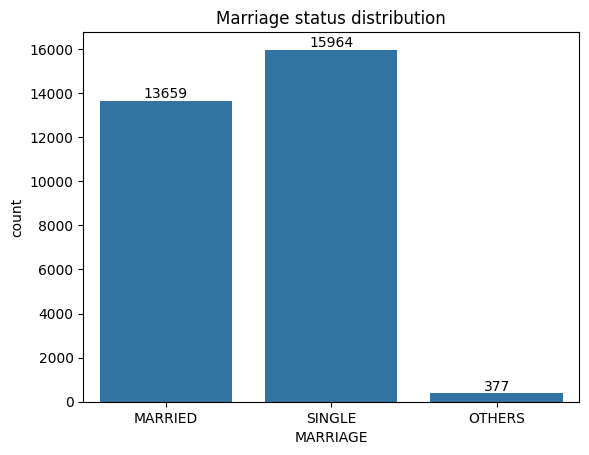

In [337]:
ax = sns.countplot(x = "MARRIAGE", data = df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

Single is the group which highest number of customers using credit cards (56%)

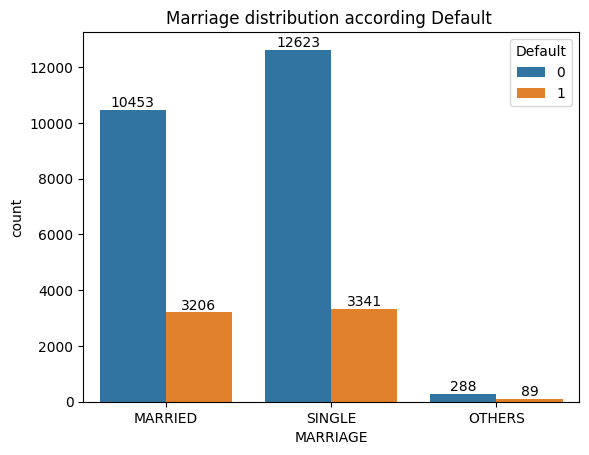

In [338]:
ax = sns.countplot(x = "MARRIAGE", data = df, hue="Default")

for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")

plt.show()

Married people are the group which has highest fraud cases(30%)

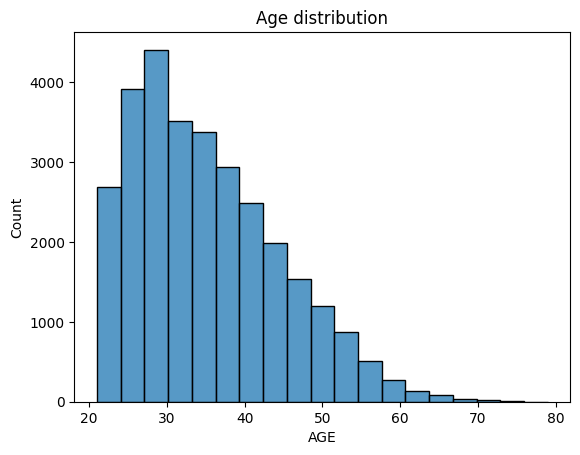

In [339]:
# AGE VARIABLE:

sns.histplot(data = df, x = "AGE", binwidth=3)
plt.title("Age distribution")
plt.show()

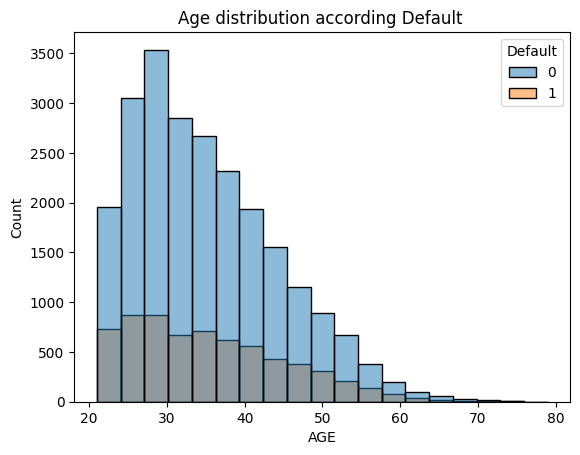

In [340]:
sns.histplot(data=df, x="AGE", hue="Default", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

* Histogram is right-skewed meaning the older customers are less likely to use credit cards
* The main client is in their 30s
* Customers in their 30s are also the most prone to credit fraud

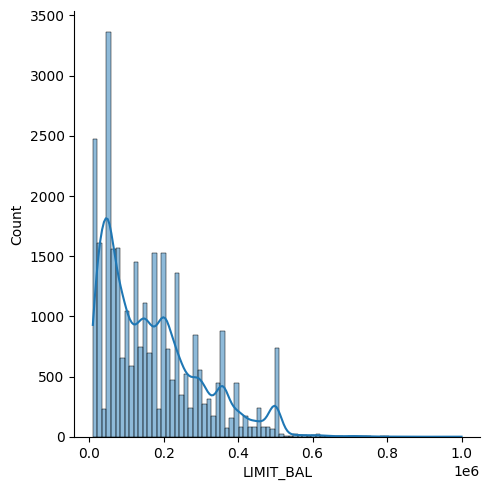

In [341]:
# LIMIT_BAL VARIABLE:

sns.displot(df.LIMIT_BAL, kde=True)
plt.show()

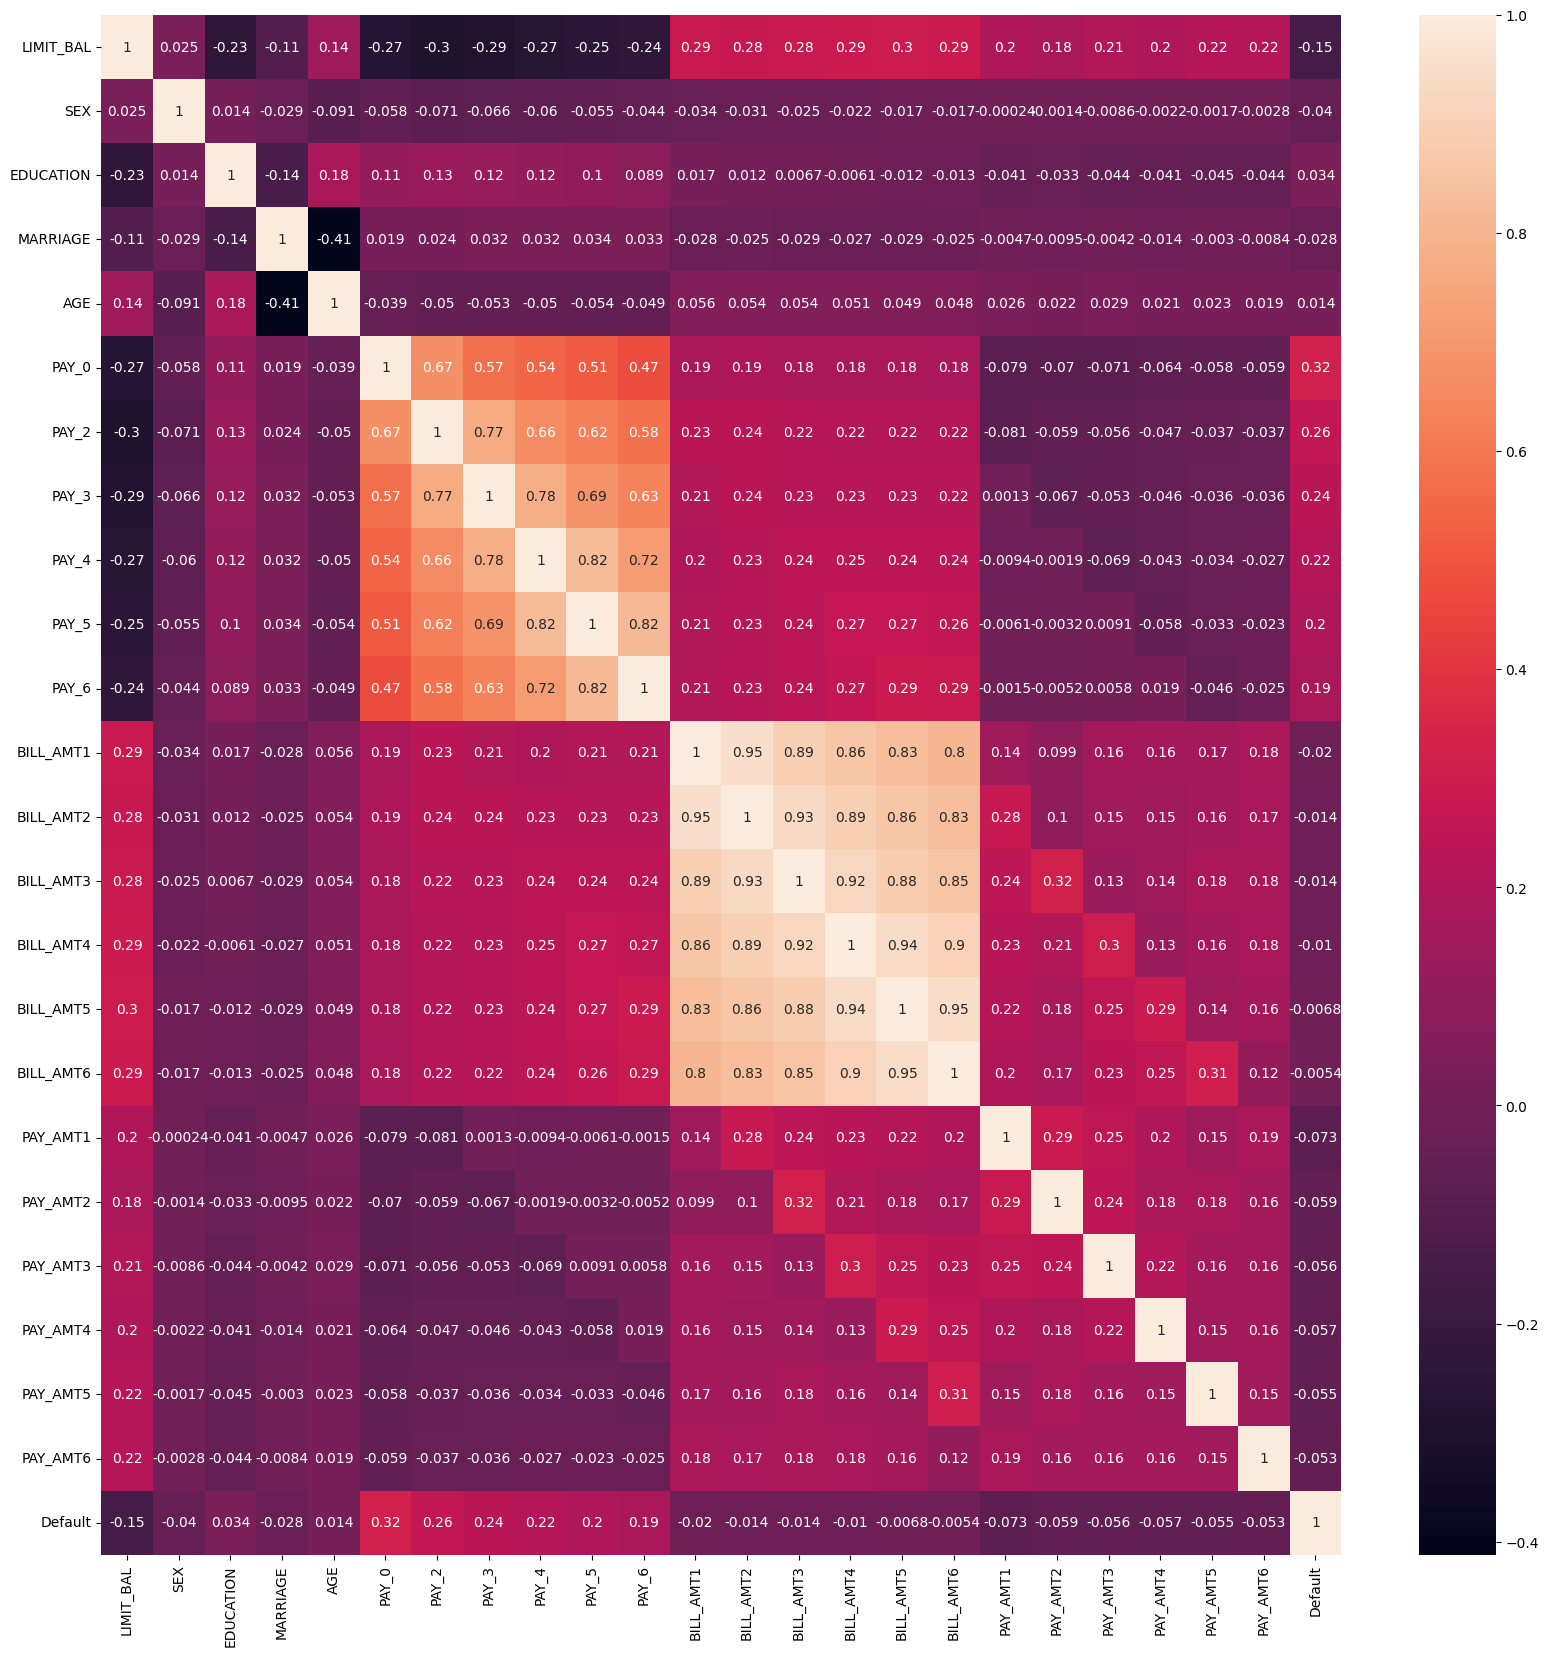

In [342]:
# Correlation Analysis

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

* Correlation is high among PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6.

# Modeling

In [343]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [344]:
# Seperating the target and independent variables

x = df.drop(["Default"], axis=1)

y = df.Default

In [345]:
print(x.shape)
print(y.shape)


(30000, 23)
(30000,)


In [346]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


### Feature Engineering: 

In [347]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [348]:
# lets Split the data 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [349]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(24000, 23)
(24000,)
(6000, 23)
(6000,)


In [350]:
## Balancing the data

from collections import Counter
from imblearn.over_sampling import SMOTE

In [351]:
# Before oversampling
print("Before oversampling: ", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# After oversampling
print("After oversampling: ", Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


In [352]:
print(x_train.shape)
print(y_train.shape)


(37354, 23)
(37354,)


## Model Building

Logistic Regression model's Accuracy: 0.6855
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.78      4687
           1       0.37      0.65      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000

Confusion Matrix of Logistic Regression:


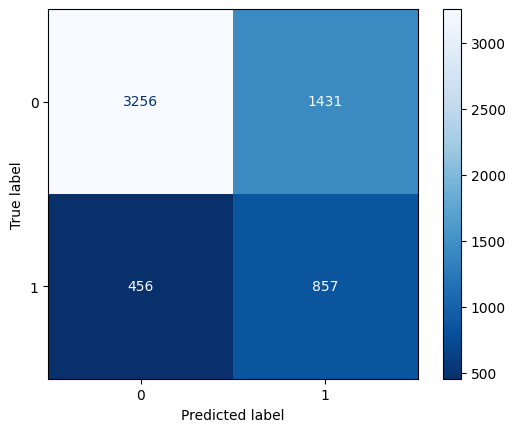

In [353]:
## Logistic regression

# model creation
reg = LogisticRegression()

# model training
reg.fit(x_train, y_train)

#model prediction
reg_pred  = reg.predict(x_test)

# Model Evaluation
print("Logistic Regression model's Accuracy:", accuracy_score(y_test, reg_pred))
print("Classification Report:\n", classification_report(y_test, reg_pred))

# Confusion Matrix
print("Confusion Matrix of Logistic Regression:")
cm = confusion_matrix(y_test, reg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg.classes_)
disp.plot(cmap="Blues_r");

DecisionTreeClassifier Accuracy 0.6973333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      4687
           1       0.35      0.46      0.40      1313

    accuracy                           0.70      6000
   macro avg       0.59      0.61      0.60      6000
weighted avg       0.73      0.70      0.71      6000

Confusion Matrix of Logistic Regression:


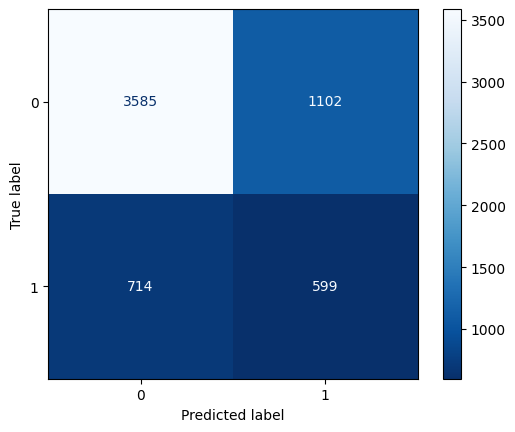

In [354]:
## Decision Tree Classifier

# model creation
tree = DecisionTreeClassifier(random_state=42)

# model trainig
tree.fit(x_train, y_train)

#model prediction
tree_pred = tree.predict(x_test)

# model Evaluation
print("DecisionTreeClassifier Accuracy", accuracy_score(y_test, tree_pred))
print("Classification Report:\n",classification_report(y_test, tree_pred))

# Confusion Matrix
print("Confusion Matrix of Logistic Regression:")
cm = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg.classes_)
disp.plot(cmap="Blues_r");

RandomForestClassifier Accuacy: 0.7921666666666667
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.53      0.46      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000

ConfusionMatrix


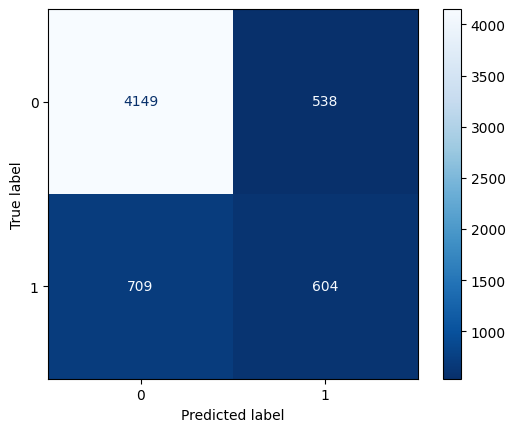

In [355]:
## Random Forest Classifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("RandomForestClassifier Accuacy:", accuracy_score(y_test, rfc_pred))
print("Classification Report :\n", classification_report(y_test, rfc_pred))

print("ConfusionMatrix")
cm = confusion_matrix(y_test, rfc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap="Blues_r");

XGBosst Accuracy: 0.8011666666666667
classifiaction Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4687
           1       0.56      0.42      0.48      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.66      0.68      6000
weighted avg       0.79      0.80      0.79      6000

ConfusionMatrix


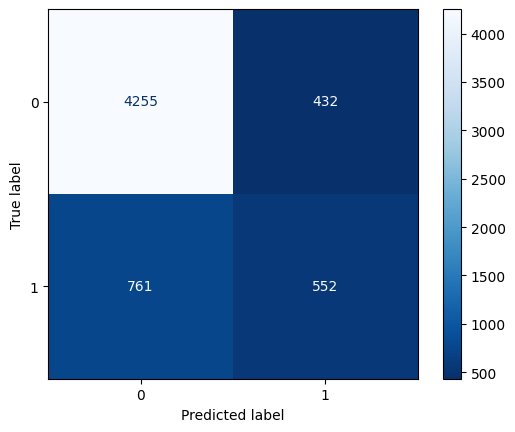

In [356]:
## XGBoost

xgb = XGBClassifier(random_state=42)

xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("XGBosst Accuracy:", accuracy_score(y_test, xgb_pred))
print("classifiaction Report:\n", classification_report(y_test, xgb_pred))

print("ConfusionMatrix")
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap="Blues_r");


# Comparesion

In [357]:
data = {'logistic Regression':69,
                'decision_tree':72.83,
               'randome_forest': 79,
                'xgboost': 81
        }
courses = list(data.keys())
values = list(data.values())

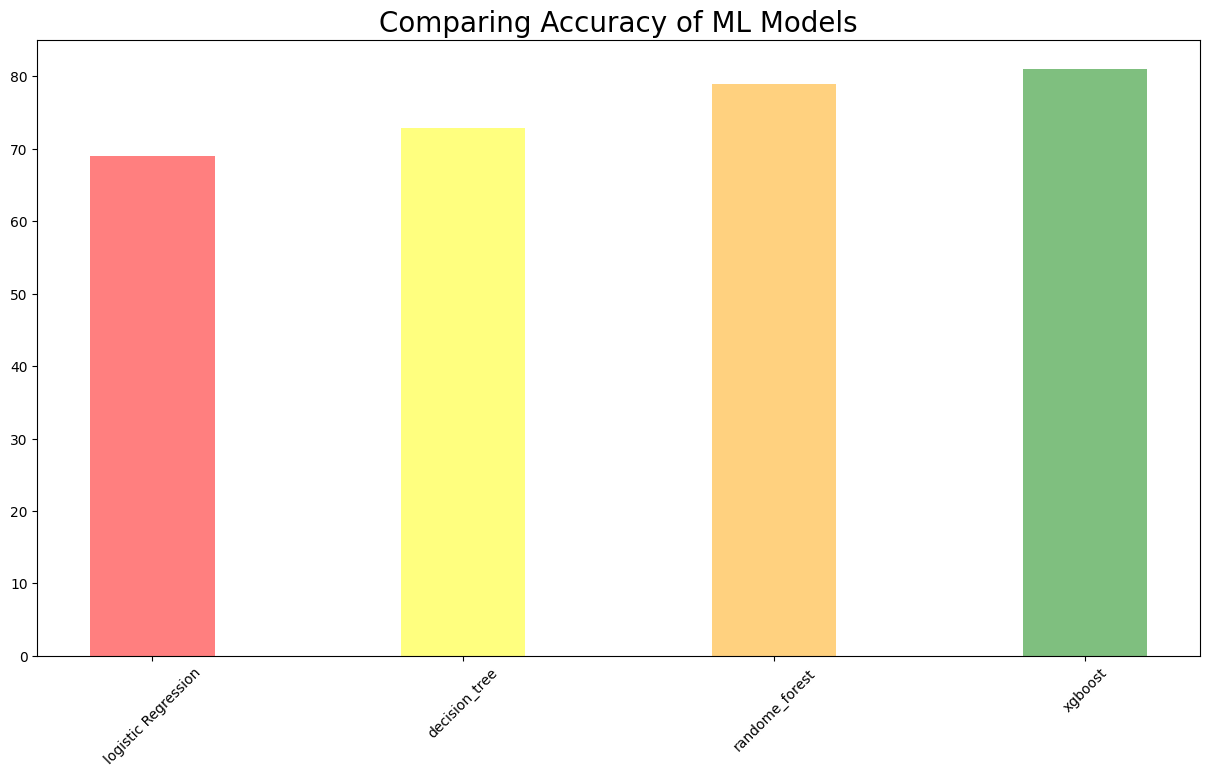

In [358]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta']
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)
plt.show()

## Conclusion:

In this project, we first check for data unbalancing, visualize the feaure and investigate in the relationship between different feature to find the strongest predictors of default payment

We then run different 5 ML models in order to find the best model for detecting credit default:

* Logistic model with 68.08% accuracy,
* Decision_tree model with 72.83% accuracy,
* Randome_forest model with 79% accuracy,
* XGboost model with 80% accuracy,

    Among all the ML model we use to predict the default credit card, XGboost Classifier model is the best model with highest accuracy score

In [359]:
## lets save our model 

import pickle, os

file_path = "../models/best_model.pkl"

dir_path = os.path.dirname(file_path) 
os.makedirs(dir_path, exist_ok=True)

with open(file_path, "wb") as file:
    pickle.dump(xgb, file) 
